# Evaluate reading level with an LLM

In this notebook we will use an LLM (GPT-4o) to review a text and see what the reading level is. 

The texts that we evaluate are the 'Verhaal Speciaal' stories. 
Please note: this notebook only works when both level of parent and child are the same! 

<img src="review_the_review_process.png" alt="Flow of this notebook">

We take the following steps:
1. Load the generated story and set the criteria for evaluation.
2. Use a reasoning model (o1-preview) to generate 5 reviews
3. Make a summary of the 5 review in bullet-points with the most used argument on top, in desceding order.
4. Ask an LLM to review this. The LLM then compares the story, the criteria and the summary. 



### Contents
0. Settings
1. Load the story
2. Review the story
3. Review the review

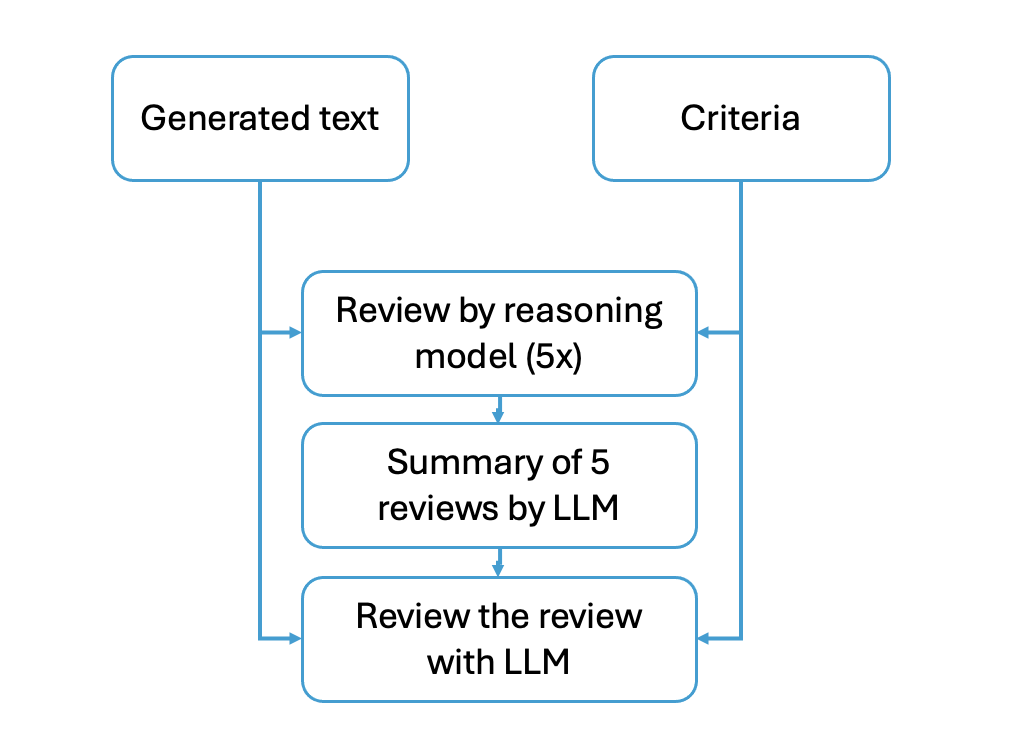

In [3]:
import IPython
IPython.display.Image('review_the_review_process.png')


## 0. Settings

In [4]:
import glob
import json
import os
import config
import openai
openai.__version__

'1.54.5'

In [5]:
#Initialize the OpenAI client 

os.environ['OPENAI_API_KEY'] = config.OpenAI_key # replace with your API-key, but don't keep it in your source code :-)

client = openai.Client()

## 1. Load the story

In [6]:
#select the latest file
json_files = glob.glob('*.json')
#print(json_files)
#sorted_files = sorted(json_files, key=os.path.getctime)
#print(sorted_files)
json_files.sort(key=os.path.getmtime)
latest_file = json_files[-2]
print(latest_file)

V_S_2024-11-28_15:31.json


In [7]:
with open(latest_file, 'r') as file:
    data = json.load(file)
generated_text = data['text']
print(generated_text)

Titel: Verloren Tussen de Bomen

Hoofdstuk 1

Verteller | Aan het begin van de zomer besloten Eddy en Jan een wandeling te maken in het dichte groene bos. Ze genoten van het zonlicht dat door de bladeren heen scheen en van de melodische vogelgeluiden die het bos vulden.

{char1} | eddy | "Wat een prachtige dag voor een wandeling, vind je niet, Jan? De natuur is werkelijk fascinerend!"

{char2} | jan | "Je hebt helemaal gelijk, Eddy. Het is alsof we in een paradijs terecht zijn gekomen. Kijk die exotische vlinders eens!"

Verteller | Terwijl ze genoten van de schoonheid van het bos, merkten ze geleidelijk aan op dat de omgeving minder bekend leek.

{char1} | eddy | "Zijn we niet een beetje te diep het bos in gegaan, Jan? Ik herken niets meer van deze omgeving..."

{char2} | jan | "Nu je het zegt, Eddy, ik herken de omgeving ook niet meer. Misschien moeten we even teruggaan."

Verteller | Maar hoe ze ook probeerden om de weg terug te vinden, ze leken enkel dieper het onbekende bos in te 

## 2. Review the story

In [8]:
system_prompt = '''Je bent een expert in het beoordelen van teksten voor kinderboeken. Je gaat een tekst beoordelen of deze aan een bepaald niveau voldoet.'''

In [9]:
#variables based on the reading level settings
level_one = 'Leesniveau 1: Tekst bestaat uit korte woorden die je precies zo schrijft zoals je ze uitspreekt. Voorbeelden hiervan zijn maan, bos, man, roos. Er mogen dus geen woorden voorkomen met bijvoorbeeld sch- en -ng en -nk, -b, -d(t), -ch(t), -ooi, -aai, -oei, -eeuw, -ieuw, -uw. De zinnen zijn zo kort mogelijk. Elke zin begint op een nieuwe regel. Er komen geen in hoofdletters voor, dus alle woorden worden met kleine letters geschreven.'

level_two = 'Leesniveau 2: Tekst bestaat uit één- en tweelettergrepige woorden. Woorden met -sch en -ng mogen voorkomen.  Woorden mogen voorkomen eindigend op -nk, -b, -d(t), -ch(t), -ooi, -aai, -oei, -eeuw, -ieuw, -uw. Een-. Ook mogen tweelettergrepige woorden met twee of drie medeklinkers na elkaar zoals staart, botst, sprong, bankje, knappe, winkel  Er mogen ook enkele makkelijke drielettergrepige woorden voorkomen, zoals sinterklaas. De zinnen zijn meestal kort. Soms mogen samengestelde zinnen voorkomen. Hoofdletters worden gebruikt.'

level_three = 'Leesniveau 3: Er mogen woorden gebruikt worden met 3 of meer lettergrepen. De zinnen mogen langer zijn. De zinnen kunnen bestaan uit een hoofdzin met een bijzin. Gebruik van leenwoorden, zoals bureau, horloge, chauffeur is beperkt toegestaan. Ook eenvoudige leesmoeilijkheden van leenwoorden komen voor: i en y uitgesproken als ie; c uitgesproken als k of als s. Zinnen mogen beginnen op dezelfde regel. Samengestelde zinnen mogen voorkomen. Hoofdletters worden gebruikt.'

level_four = 'Leesniveau 4: Er zijn geen beperkingen in woorden en zinslengte. Lastig te lezen leenwoorden (gamen), onbekende woorden (ov-pas, ornament) en leestekens (ideeën, ruïne) komen meer voor. Woorden eindigend op -ele, -eaal, -ueel, -iaal of -ieel komen voor. Ook woorden met een trema komen voor. Ook woorden beginnend met /ch/ uitgesproken als /sj/, eindigend op –ge, uitgesproken als /zje/, eindigend op –isch, woorden met klinkerreeks, leenwoorden met eau, é of è. Hoofdletters worden gebruikt.'

leesniveaus = level_one + level_two +level_three + level_four
leesniveaus

'Leesniveau 1: Tekst bestaat uit korte woorden die je precies zo schrijft zoals je ze uitspreekt. Voorbeelden hiervan zijn maan, bos, man, roos. Er mogen dus geen woorden voorkomen met bijvoorbeeld sch- en -ng en -nk, -b, -d(t), -ch(t), -ooi, -aai, -oei, -eeuw, -ieuw, -uw. De zinnen zijn zo kort mogelijk. Elke zin begint op een nieuwe regel. Er komen geen in hoofdletters voor, dus alle woorden worden met kleine letters geschreven.Leesniveau 2: Tekst bestaat uit één- en tweelettergrepige woorden. Woorden met -sch en -ng mogen voorkomen.  Woorden mogen voorkomen eindigend op -nk, -b, -d(t), -ch(t), -ooi, -aai, -oei, -eeuw, -ieuw, -uw. Een-. Ook mogen tweelettergrepige woorden met twee of drie medeklinkers na elkaar zoals staart, botst, sprong, bankje, knappe, winkel  Er mogen ook enkele makkelijke drielettergrepige woorden voorkomen, zoals sinterklaas. De zinnen zijn meestal kort. Soms mogen samengestelde zinnen voorkomen. Hoofdletters worden gebruikt.Leesniveau 3: Er mogen woorden gebru

In [10]:
#Create the prompt

#prompt = system_prompt + leesniveaus + "Analyseer op welk leesniveau de volgende tekst is geschreven. Antwoord alleen het leesniveau. De woorden: Verteller, ENDOFACT, char1, char2, Hoofdstuk neem je NIET mee in je beoordeling."  + generated_text
prompt = system_prompt + leesniveaus + "Analyseer op welk leesniveau de volgende tekst is geschreven. Antwoord als eerste het leesniveua en beschrijf daarna je redenering. De woorden: Verteller, ENDOFACT, char1, char2, Hoofdstuk neem je NIET mee in je beoordeling."  + generated_text
prompt

'Je bent een expert in het beoordelen van teksten voor kinderboeken. Je gaat een tekst beoordelen of deze aan een bepaald niveau voldoet.Leesniveau 1: Tekst bestaat uit korte woorden die je precies zo schrijft zoals je ze uitspreekt. Voorbeelden hiervan zijn maan, bos, man, roos. Er mogen dus geen woorden voorkomen met bijvoorbeeld sch- en -ng en -nk, -b, -d(t), -ch(t), -ooi, -aai, -oei, -eeuw, -ieuw, -uw. De zinnen zijn zo kort mogelijk. Elke zin begint op een nieuwe regel. Er komen geen in hoofdletters voor, dus alle woorden worden met kleine letters geschreven.Leesniveau 2: Tekst bestaat uit één- en tweelettergrepige woorden. Woorden met -sch en -ng mogen voorkomen.  Woorden mogen voorkomen eindigend op -nk, -b, -d(t), -ch(t), -ooi, -aai, -oei, -eeuw, -ieuw, -uw. Een-. Ook mogen tweelettergrepige woorden met twee of drie medeklinkers na elkaar zoals staart, botst, sprong, bankje, knappe, winkel  Er mogen ook enkele makkelijke drielettergrepige woorden voorkomen, zoals sinterklaas. D

In [11]:
def call_openai_function(client, prompt, model="o1-preview"):
    return client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model=model,
    )


In [12]:
results = []
for i in range(5):
    chat_completion = call_openai_function(client, prompt)
    evaluation_by_llm = chat_completion.choices[0].message.content
    results.append(evaluation_by_llm)
    print(f'Run {i+1}: {latest_file} = {evaluation_by_llm}')

Run 1: V_S_2024-11-28_15:31.json = **Leesniveau 4**

**Redenering:**

De tekst voldoet aan **leesniveau 4** op basis van de volgende kenmerken:

1. **Geen beperkingen in woorden en zinslengte**: De tekst bevat lange en complexe zinnen, met samengestelde zinnen en bijzinnen. Voorbeelden:

   - *"Aan het begin van de zomer besloten Eddy en Jan een wandeling te maken in het dichte groene bos."*
   - *"Ondanks de groeiende angst voelde Eddy een vlaag van avontuur door zich heen stromen."*

2. **Gebruik van lastige leenwoorden en onbekende woorden**: De tekst bevat meerdere complexe en minder bekende woorden, zoals:

   - **Leenwoorden**: *exotische*, *melodische*, *antieke*, *optimistische*, *avonturiers*, *charme*, *routewijzer*.
   - **Onbekende woorden**: *statige*, *hernieuwde*, *ongerustheid*, *omstandigheden*, *peinzende*.

3. **Woorden eindigend op -ele, -eaal, -ueel, -iaal of -ieel**: Hoewel deze specifieke uitgangen minder prominent zijn, komen soortgelijke complexe woorden voor, 

In [13]:
def list_to_string(input_list):
    # Initialize an empty string
    result_string = ""
    
    # Iterate through each item in the list
    for item in input_list:
        # Convert the item to a string and add it to the result
        result_string += str(item)
    
    return result_string

# Example usage:
all_evaluations = list_to_string(results)
print(all_evaluations)  

**Leesniveau 4**

**Redenering:**

De tekst voldoet aan **leesniveau 4** op basis van de volgende kenmerken:

1. **Geen beperkingen in woorden en zinslengte**: De tekst bevat lange en complexe zinnen, met samengestelde zinnen en bijzinnen. Voorbeelden:

   - *"Aan het begin van de zomer besloten Eddy en Jan een wandeling te maken in het dichte groene bos."*
   - *"Ondanks de groeiende angst voelde Eddy een vlaag van avontuur door zich heen stromen."*

2. **Gebruik van lastige leenwoorden en onbekende woorden**: De tekst bevat meerdere complexe en minder bekende woorden, zoals:

   - **Leenwoorden**: *exotische*, *melodische*, *antieke*, *optimistische*, *avonturiers*, *charme*, *routewijzer*.
   - **Onbekende woorden**: *statige*, *hernieuwde*, *ongerustheid*, *omstandigheden*, *peinzende*.

3. **Woorden eindigend op -ele, -eaal, -ueel, -iaal of -ieel**: Hoewel deze specifieke uitgangen minder prominent zijn, komen soortgelijke complexe woorden voor, zoals *melodische* en *optimistisch

In [14]:
prompt = 'Je bent een expert in het samenvatten van teksten. Vat de tekst bulletsgewijs samen. Vermeld de meestvoorkomende argumenten bovenaan de lijst, in aflopende volgorde. Je analyseert de volgende tekst:' + all_evaluations 

In [15]:
#Function to call the OpenAI API
def create_chat_completion(prompt, model="gpt-4"):
  
    # Create the chat completion
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt
            }
            ],
        model=model,
    )

    # Return the generated response
    summary_of_evaluations = chat_completion.choices[0].message.content
    return summary_of_evaluations
summary = create_chat_completion(prompt)
print(summary)

- De tekst is geschikt voor leesniveau 4 op basis van factoren zoals complexe woorden en zinslengte, gebruik van moeilijke leenwoorden en onbekende woorden, woorden met specifieke uitgangen, complexe lettercombinaties en klinkerreeksen, gebruik van hoofdletters en leestekens, complexe zinsconstructies en eenvoudige leesmoeilijkheden van leenwoorden.
- De tekst is ook geschikt voor leesniveau 3 gezien het bevat woorden met drie of meer lettergrepen, langere zinnen met bijzinnen, een beperkt gebruik van leenwoorden, eenvoudige leesmoeilijkheden van leenwoorden en correct gebruik van hoofdletters en interpunctie.
- Volgens de analyse bevat de tekst geen woorden of schrijfwijzen die specifiek zijn voor leesniveaus 1 of 2, en overschrijdt het de grenzen van leesniveau 3, maar bereikt het niet de complexiteit van leesniveau 4.
- Factoren die bijdragen aan de complexiteit van de tekst voor een hoger leesniveau zijn onder andere abstracte concepten, metaforen en uitspraakuitdagingen in bepaald

## 3. Review the review

In this chapter we will review the review. We will ask an LLM to compare the following:
- The text generated  {latest_file}
- The reading_levels provided
- The review by o1-preview 

Steps:
1. Create a prompt
2. Ask the question to an LLM (GPT-4o) for now
3. Check the response


In [18]:
#set the prompt
review_the_review_prompt = f'Je bent een expert in het reviewen van teksten. Je beoordeelt of de volgende tekst: {generated_text}  goed beoordeeld is. De tekst is beoordeeld op de de volgende leesniveaus: {leesniveaus}. Het resultaat van de beoordeling vind je hier: {summary}. Geef kort antwoord of de beoordeling correct is of niet.'
review_the_review_prompt

'Je bent een expert in het reviewen van teksten. Je beoordeelt of de volgende tekst: Titel: Verloren Tussen de Bomen\n\nHoofdstuk 1\n\nVerteller | Aan het begin van de zomer besloten Eddy en Jan een wandeling te maken in het dichte groene bos. Ze genoten van het zonlicht dat door de bladeren heen scheen en van de melodische vogelgeluiden die het bos vulden.\n\n{char1} | eddy | "Wat een prachtige dag voor een wandeling, vind je niet, Jan? De natuur is werkelijk fascinerend!"\n\n{char2} | jan | "Je hebt helemaal gelijk, Eddy. Het is alsof we in een paradijs terecht zijn gekomen. Kijk die exotische vlinders eens!"\n\nVerteller | Terwijl ze genoten van de schoonheid van het bos, merkten ze geleidelijk aan op dat de omgeving minder bekend leek.\n\n{char1} | eddy | "Zijn we niet een beetje te diep het bos in gegaan, Jan? Ik herken niets meer van deze omgeving..."\n\n{char2} | jan | "Nu je het zegt, Eddy, ik herken de omgeving ook niet meer. Misschien moeten we even teruggaan."\n\nVerteller |

In [19]:
#Function to call the OpenAI API
def create_chat_completion(prompt, model="gpt-4"):
  
    # Create the chat completion
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt
            }
            ],
        model=model,
    )

    # Return the generated response
    reviewer = chat_completion.choices[0].message.content
    return reviewer

create_chat_completion(review_the_review_prompt)

'De beoordeling lijkt correct te zijn.'